In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gpflow

from utils import *
from plot import *

In [3]:
XY = np.loadtxt('../data/split_data_test.csv', delimiter=',', skiprows=1, usecols=[1, 2])
X = XY[:, 0, None]
Y = XY[:, 1, None]

In [26]:
np.random.seed(1)
M = 50

Z = np.random.permutation(X)[:M]

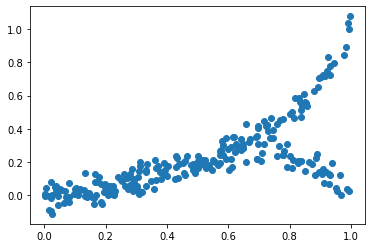

In [51]:
plt.scatter(X, Y)
#for z in Z:
#    plt.vlines(x=z, ymin=-0.2, ymax=0.6, color='r')

In [64]:
m = init_split_gplvm(
    Y=Y,
    split_space=False,
    Qp=1,
    K=2,
    kernel_K=[
        gpflow.kernels.SquaredExponential(lengthscales=[1.0]),
        gpflow.kernels.SquaredExponential(lengthscales=[1.0])
    ],
    Xp_mean_init=X,
    Xp_var_init=np.full((250, 1), 1e-4),
    Zp=X,
    pi_init=tf.constant(np.random.dirichlet(alpha=[2, 2], size=(X.shape[0])), dtype=default_float())
)
m.likelihood.variance.assign(0.01)
set_trainable(m.Xp_mean, False)
set_trainable(m.Xp_var, False)
set_trainable(m.Zp, False)

set_trainable(m.likelihood.variance, False)
set_trainable(m.kernel_K[0].variance, False)
set_trainable(m.kernel_K[1].variance, False)
set_trainable(m.kernel_K[0].lengthscales, False)
set_trainable(m.kernel_K[1].lengthscales, False)

In [65]:
m

name,class,transform,prior,trainable,shape,dtype,value
SplitGPLVM.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.009999999999999998
SplitGPLVM.kernel_K[0].variance,Parameter,Softplus,,False,(),float64,1.0
SplitGPLVM.kernel_K[0].lengthscales,Parameter,Softplus,,False,"(1,)",float64,[1.]
SplitGPLVM.kernel_K[1].variance,Parameter,Softplus,,False,(),float64,1.0
SplitGPLVM.kernel_K[1].lengthscales,Parameter,Softplus,,False,"(1,)",float64,[1.]
SplitGPLVM.Xp_mean,Parameter,,,False,"(250, 1)",float64,[[0.26944732...
SplitGPLVM.Xp_var,Parameter,Softplus,,False,"(250, 1)",float64,[[1.e-04...
SplitGPLVM.pi,Parameter,SoftmaxCentered,,True,"(250, 2)",float64,"[[0.95315391, 0.04684609..."
SplitGPLVM.Zp.Z,Parameter,,,False,"(250, 1)",float64,[[0.26944732...
SplitGPLVM.q_mu[0],Parameter,,,True,"(250, 1)",float64,[[0....


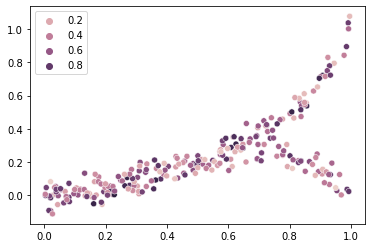

In [66]:
plot_assignment(m, XY)

Text(0, 0.5, 'GP 0 assignment probability')

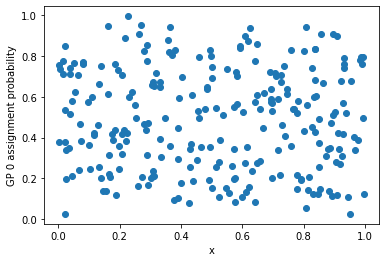

In [67]:
plt.scatter(X, m.pi.numpy()[:, 0])
plt.xlabel('x')
plt.ylabel('GP 0 assignment probability')

In [68]:
%%time
elbo = train_natgrad_adam(m, 100, 1)

initial elbo -549262565.6413
iteration 1 elbo -1261.3819, took 15.4704s
iteration 2 elbo -1261.0039, took 7.4520s
iteration 3 elbo -1260.6286, took 7.0569s
iteration 4 elbo -1260.2558, took 6.5979s
iteration 5 elbo -1259.8855, took 6.6132s
iteration 6 elbo -1259.5179, took 7.5417s
iteration 7 elbo -1259.1528, took 6.2648s
iteration 8 elbo -1258.7904, took 6.2753s
iteration 9 elbo -1258.4305, took 6.3194s
iteration 10 elbo -1258.0731, took 6.4039s
iteration 11 elbo -1257.7182, took 6.8358s
iteration 12 elbo -1257.3657, took 6.3984s
iteration 13 elbo -1257.0154, took 6.1624s
iteration 14 elbo -1256.6672, took 6.3839s
iteration 15 elbo -1256.3210, took 6.2886s
iteration 16 elbo -1255.9766, took 6.3644s
iteration 17 elbo -1255.6337, took 6.4295s
iteration 18 elbo -1255.2921, took 6.4590s
iteration 19 elbo -1254.9517, took 6.3318s
iteration 20 elbo -1254.6121, took 6.1477s
iteration 21 elbo -1254.2730, took 6.4353s
iteration 22 elbo -1253.9341, took 6.4447s
iteration 23 elbo -1253.5950, too

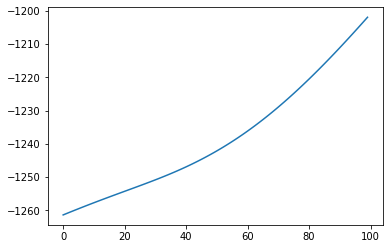

In [69]:
plt.plot(elbo)

In [75]:
m

name,class,transform,prior,trainable,shape,dtype,value
SplitGPLVM.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.009999999999999998
SplitGPLVM.kernel_K[0].variance,Parameter,Softplus,,False,(),float64,1.0
SplitGPLVM.kernel_K[0].lengthscales,Parameter,Softplus,,False,"(1,)",float64,[1.]
SplitGPLVM.kernel_K[1].variance,Parameter,Softplus,,False,(),float64,1.0
SplitGPLVM.kernel_K[1].lengthscales,Parameter,Softplus,,False,"(1,)",float64,[1.]
SplitGPLVM.Xp_mean,Parameter,,,False,"(250, 1)",float64,[[0.26944732...
SplitGPLVM.Xp_var,Parameter,Softplus,,False,"(250, 1)",float64,[[1.e-04...
SplitGPLVM.pi,Parameter,SoftmaxCentered,,True,"(250, 2)",float64,"[[0.87301475, 0.12698525..."
SplitGPLVM.Zp.Z,Parameter,,,False,"(250, 1)",float64,[[0.26944732...
SplitGPLVM.q_mu[0],Parameter,,,False,"(250, 1)",float64,[[6.98622256e-02...


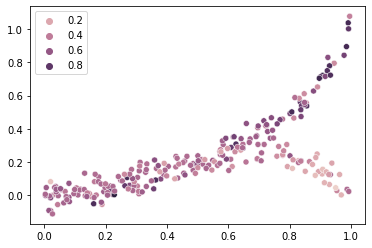

In [76]:
plot_assignment(m, XY)

Text(0, 0.5, 'GP 0 assignment probability')

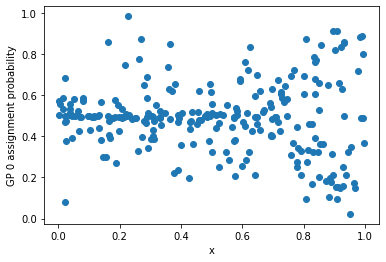

In [77]:
plt.scatter(X, m.pi.numpy()[:, 0])
plt.xlabel('x')
plt.ylabel('GP 0 assignment probability')

In [78]:
pred, pred_K = get_pred_Y(m, True)

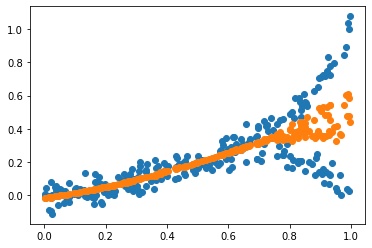

In [79]:
plt.scatter(X, Y)
plt.scatter(X, pred, label='pred')

Allow model to train hyperparameters

In [80]:
set_trainable(m.likelihood.variance, True)
set_trainable(m.kernel_K[0].variance, True)
set_trainable(m.kernel_K[1].variance, True)
set_trainable(m.kernel_K[0].lengthscales, True)
set_trainable(m.kernel_K[1].lengthscales, True)

In [81]:
m

name,class,transform,prior,trainable,shape,dtype,value
SplitGPLVM.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.009999999999999998
SplitGPLVM.kernel_K[0].variance,Parameter,Softplus,,True,(),float64,1.0
SplitGPLVM.kernel_K[0].lengthscales,Parameter,Softplus,,True,"(1,)",float64,[1.]
SplitGPLVM.kernel_K[1].variance,Parameter,Softplus,,True,(),float64,1.0
SplitGPLVM.kernel_K[1].lengthscales,Parameter,Softplus,,True,"(1,)",float64,[1.]
SplitGPLVM.Xp_mean,Parameter,,,False,"(250, 1)",float64,[[0.26944732...
SplitGPLVM.Xp_var,Parameter,Softplus,,False,"(250, 1)",float64,[[1.e-04...
SplitGPLVM.pi,Parameter,SoftmaxCentered,,True,"(250, 2)",float64,"[[0.87301475, 0.12698525..."
SplitGPLVM.Zp.Z,Parameter,,,False,"(250, 1)",float64,[[0.26944732...
SplitGPLVM.q_mu[0],Parameter,,,False,"(250, 1)",float64,[[6.98622256e-02...


In [95]:
elbo1 = train_natgrad_adam(m, 200, 1)

initial elbo -1052.8703
iteration 1 elbo -1052.0640, took 34.5952s
iteration 2 elbo -1051.2650, took 21.2137s
iteration 3 elbo -1050.4954, took 20.4654s
iteration 4 elbo -1049.7479, took 24.0797s
iteration 5 elbo -1049.0222, took 24.3892s
iteration 6 elbo -1048.3195, took 22.1345s
iteration 7 elbo -1047.6402, took 21.8415s
iteration 8 elbo -1046.9836, took 19.5997s
iteration 9 elbo -1046.3491, took 19.7034s
iteration 10 elbo -1045.7369, took 20.2111s
iteration 11 elbo -1045.1474, took 19.8450s
iteration 12 elbo -1044.5801, took 21.2388s
iteration 13 elbo -1044.0344, took 20.1380s
iteration 14 elbo -1043.5098, took 18.7342s
iteration 15 elbo -1043.0058, took 18.4897s
iteration 16 elbo -1042.5224, took 19.4330s
iteration 17 elbo -1042.0591, took 18.9591s
iteration 18 elbo -1041.6152, took 20.8678s
iteration 19 elbo -1041.1901, took 20.1559s
iteration 20 elbo -1040.7834, took 18.9153s
iteration 21 elbo -1040.3947, took 21.1620s
iteration 22 elbo -1040.0235, took 20.5365s
iteration 23 elbo

iteration 185 elbo -1021.4626, took 19.7765s
iteration 186 elbo -1021.3887, took 19.1080s
iteration 187 elbo -1021.3151, took 18.7039s
iteration 188 elbo -1021.2417, took 18.2739s
iteration 189 elbo -1021.1690, took 19.7567s
iteration 190 elbo -1021.0967, took 18.9761s
iteration 191 elbo -1021.0246, took 19.9582s
iteration 192 elbo -1020.9531, took 18.8470s
iteration 193 elbo -1020.8821, took 24.2493s
iteration 194 elbo -1020.8113, took 20.9057s
iteration 195 elbo -1020.7410, took 20.7299s
iteration 196 elbo -1020.6713, took 19.9217s
iteration 197 elbo -1020.6018, took 20.0603s
iteration 198 elbo -1020.5328, took 21.8870s
iteration 199 elbo -1020.4643, took 20.1004s
iteration 200 elbo -1020.3961, took 18.6622s


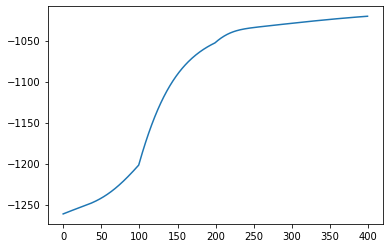

In [96]:
plt.plot(elbo + elbo1)

In [97]:
m

name,class,transform,prior,trainable,shape,dtype,value
SplitGPLVM.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.024489272850915136
SplitGPLVM.kernel_K[0].variance,Parameter,Softplus,,True,(),float64,0.43103998296855195
SplitGPLVM.kernel_K[0].lengthscales,Parameter,Softplus,,True,"(1,)",float64,[0.40398061]
SplitGPLVM.kernel_K[1].variance,Parameter,Softplus,,True,(),float64,0.07308486318672265
SplitGPLVM.kernel_K[1].lengthscales,Parameter,Softplus,,True,"(1,)",float64,[0.32290214]
SplitGPLVM.Xp_mean,Parameter,,,False,"(250, 1)",float64,[[0.26944732...
SplitGPLVM.Xp_var,Parameter,Softplus,,False,"(250, 1)",float64,[[1.e-04...
SplitGPLVM.pi,Parameter,SoftmaxCentered,,True,"(250, 2)",float64,"[[0.50487002, 0.49512998..."
SplitGPLVM.Zp.Z,Parameter,,,False,"(250, 1)",float64,[[0.26944732...
SplitGPLVM.q_mu[0],Parameter,,,False,"(250, 1)",float64,[[8.32823616e-02...


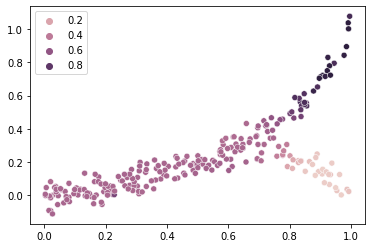

In [98]:
plot_assignment(m, XY)

Text(0, 0.5, 'GP 0 assignment probability')

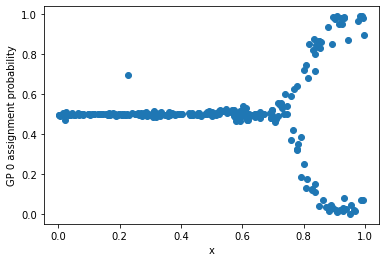

In [99]:
plt.scatter(X, m.pi.numpy()[:, 0])
plt.xlabel('x')
plt.ylabel('GP 0 assignment probability')

In [100]:
pred, pred_K = get_pred_Y(m, True)

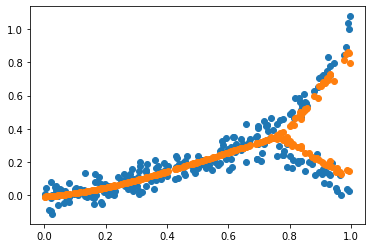

In [101]:
plt.scatter(X, Y)
plt.scatter(X, pred, label='pred')